In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [303]:
math = pd.read_csv('student-mat.csv', index_col = 0) #students of math course

In [304]:
port = pd.read_csv('student-por.csv', index_col = 0) #students of portuguese course

In [308]:
#math.head(30)
#math.tail()
#math.dtypes
#math.info
#math.columns
#math.describe(include = 'all')

In [306]:
#port.head()
#port.tail()
#port.dtypes
#port.info
#port.describe(include = 'all').loc['count']

In [320]:
df = [math,port]
df = pd.concat(df)
df.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

#Normalisation
port_n = port.copy()
for col in port_n:
    if port_n[col].dtype == 'int64':
        port_n[col] = (port_n[col] - port_n[col].mean())/port_n[col].std()

In [342]:
le1 = preprocessing.LabelEncoder()
df = df.astype(str).apply(le1.fit_transform)

In [343]:
df = pd.get_dummies(df)

2     153
3     151
5     113
4     103
6      90
7      82
17     67
18     63
0      53
8      52
9      35
10     27
16     19
15     18
14      8
11      7
12      1
13      1
1       1
Name: G3, dtype: int64

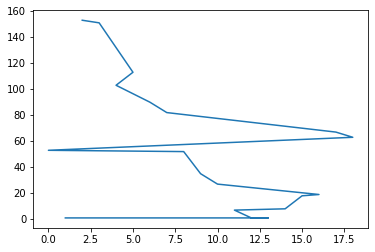

In [344]:
plt.plot(df['G3'].value_counts())
df['G3'].value_counts()

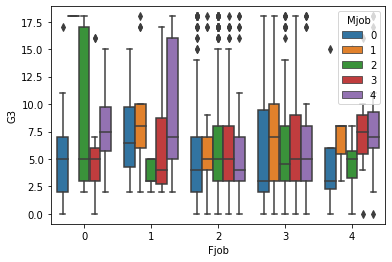

In [345]:
sns.boxplot(x = 'Fjob', y = 'G3', data = df, hue = 'Mjob')

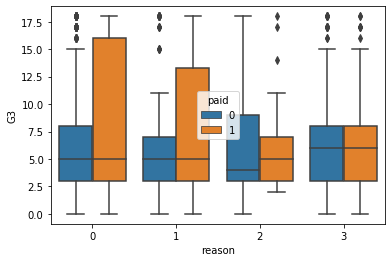

In [346]:
sns.boxplot(x = 'reason', y = 'G3', data = df, hue = 'paid')

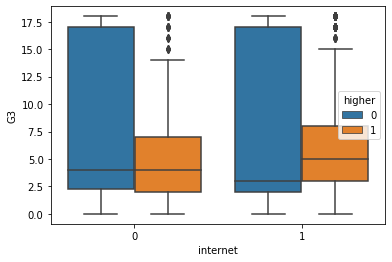

In [347]:
sns.boxplot(x = 'internet', y = 'G3', data = df, hue = 'higher')

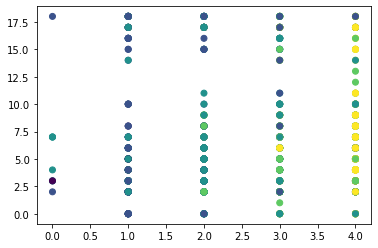

In [348]:
plt.scatter(x = df['Medu'], y = df['G3'], c = df['Fedu'])

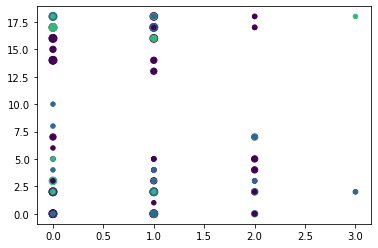

In [349]:
plt.scatter(x = df['studytime'], y = df['G3'], c = df['traveltime'], s = df['failures']*20)

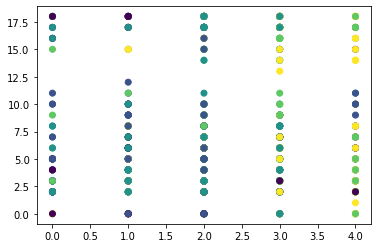

In [350]:
plt.scatter(x = df['freetime'], y = df['G3'], c = df['goout'])

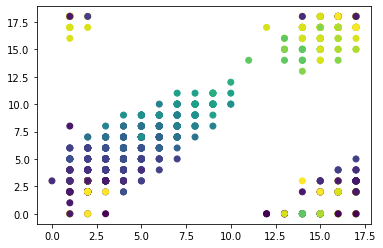

In [351]:
plt.scatter(x = df['G1'], y = df['G3'], c = df['G2'])

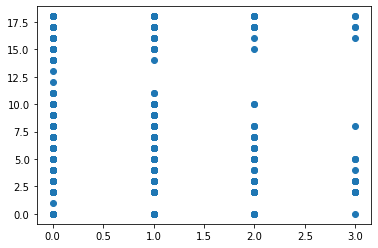

In [352]:
plt.scatter(x = df['traveltime'], y = df['G3'])

Text(0, 0.5, 'higher')

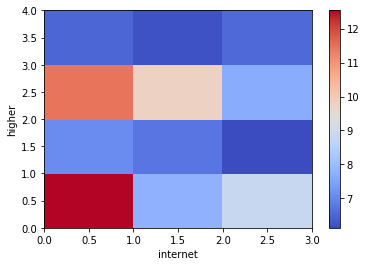

In [386]:
grp = df[['G1', 'G2','G3','higher','internet']].groupby(['internet','higher']).mean()
plt.pcolor(grp, cmap = 'coolwarm')
plt.colorbar()
plt.xlabel('internet')
plt.ylabel('higher')

In [354]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [356]:
#KNN classification

In [357]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('G3',axis=1))
scaled_features = scaler.transform(df.drop('G3',axis=1))

In [358]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['G3'],test_size=0.3)

In [359]:
from sklearn.neighbors import KNeighborsClassifier

In [362]:
error_rate = []
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

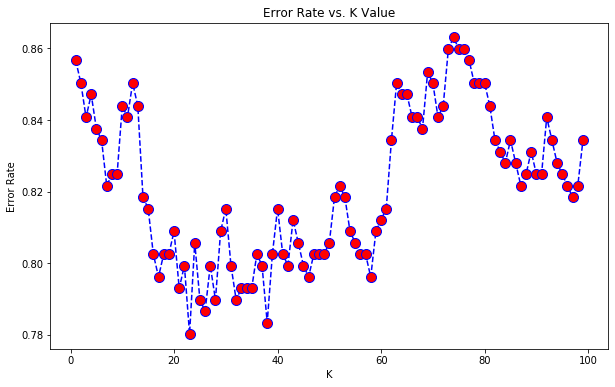

In [363]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [364]:
knn = KNeighborsClassifier(n_neighbors=22)

knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

print('\n')
print(confusion_matrix(y_test,pred_knn))
print('\n')
print(classification_report(y_test,pred_knn))



[[ 4  7  1  1  1  0  0  0  0  2  0  0  0  0  0  1  0]
 [ 2 14 12  4  7  4  1  0  0  0  0  0  0  0  0  2  0]
 [ 1  6 16  7 18  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  7  8  3  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3 10  2  9  5  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  1  7  3  5  4  2  2  1  0  0  0  0  0  0  0  0]
 [ 2  0  4  3 11  5  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  2  2  3  7  4  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  5  2  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  3  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  2  2  0  1  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 1  4  0  0  0  0  0  1  0  1  0  0  0  0  0  2  0]
 [ 2 10  0  0  0  1  2  0  1  0  0  0  0  0  0  4  0]
 [ 1 11  2  0  4  1  0  0  0  0  0  0  0  0  0  1  2]]


              precision    recall  f1-score   support

           0       0.3

C:\Users\Mrinali Saxena\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#logistic regression

In [365]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['G3'],test_size=0.3)

In [366]:
from sklearn.linear_model import LogisticRegression

In [367]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Mrinali Saxena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [368]:
pred_logmodel = logmodel.predict(X_test)

In [369]:
print(classification_report(y_test,pred_logmodel))

              precision    recall  f1-score   support

           0       0.41      0.30      0.35        23
           1       0.00      0.00      0.00         1
           2       0.19      0.20      0.20        44
           3       0.20      0.29      0.24        45
           4       0.11      0.10      0.11        30
           5       0.17      0.11      0.13        36
           6       0.18      0.27      0.22        22
           7       0.29      0.21      0.24        29
           8       0.00      0.00      0.00        18
           9       0.12      0.20      0.15        10
          10       0.00      0.00      0.00        11
          11       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         4
          15       0.50      0.29      0.36         7
          16       0.00      0.00      0.00         1
          17       0.26      0.40      0.32        15
          18       0.22      0.12      0.15        17

    accuracy              

C:\Users\Mrinali Saxena\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [370]:
from sklearn.tree import DecisionTreeClassifier

In [371]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [372]:
pred_dtree = dtree.predict(X_test)

In [373]:
print(classification_report(y_test,pred_dtree))
print(confusion_matrix(y_test,pred_dtree))

              precision    recall  f1-score   support

           0       0.71      0.52      0.60        23
           1       0.00      0.00      0.00         1
           2       0.40      0.39      0.40        44
           3       0.49      0.51      0.50        45
           4       0.39      0.43      0.41        30
           5       0.50      0.47      0.49        36
           6       0.29      0.36      0.32        22
           7       0.54      0.48      0.51        29
           8       0.50      0.33      0.40        18
           9       0.31      0.40      0.35        10
          10       0.43      0.27      0.33        11
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          14       0.50      0.25      0.33         4
          15       0.50      0.43      0.46         7
          16       0.00      0.00      0.00         1
          17       0.13      0.13      0.13        15
          18       0.11    

C:\Users\Mrinali Saxena\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mrinali Saxena\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [374]:
#SVM

In [375]:
from sklearn.svm import SVC

In [376]:
model = SVC()
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [377]:
pred_svm = model.predict(X_test)

In [378]:
print(confusion_matrix(y_test,pred_svm))
print(classification_report(y_test,pred_svm))

[[ 1  0 14  4  1  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  4  4  4  4  2  0  0  0  0  0  0  0  6  0]
 [ 0  0 13 14  5  7  5  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  9 16  1  3  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  5 16  2  5  5  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  5  1  5  8  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  8  2  7  8  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  3  1  7  4  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  1  0  1  6  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  1  0  1  5  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  4  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  1  0  0  0  0  0  0  0  9  1]
 [ 1  0 10  2  0  0  1  0  0  0  0  0  0  0  0  3  0]]
              precision    recall  f1-score   support

           0       0.50   

C:\Users\Mrinali Saxena\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [379]:
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [381]:
predlinreg = lm1.predict(X_test)
predlinreg = [round(num, 0) for num in predlinreg]
    

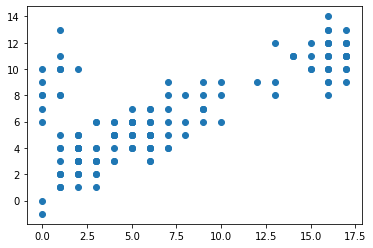

In [382]:
plt.scatter(y_test,predlinreg)

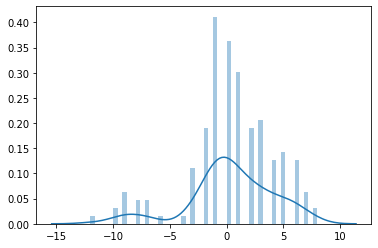

In [383]:
sns.distplot((y_test-predlinreg),bins=50)

In [384]:
print('MAE:', metrics.mean_absolute_error(y_test, predlinreg))
print('MSE:', metrics.mean_squared_error(y_test, predlinreg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predlinreg)))

MAE: 2.8164556962025316
MSE: 14.841772151898734
RMSE: 3.852502063840944


In [385]:
lm1.score(X_test, y_test)

0.5329093751005136